# Tabular Kaggle Project

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, May 3rd 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/sites/Course_2242_data_3402_001-vUhPXzAGLgTnk/Shared%20Documents/General/TabularDatasets.xlsx?d=w17e157db75904dfcb03a78c84f10e2e6&csf=1&web=1&e=KHi7m9). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.


## Data Loading and Initial Look

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!head 'train.csv'

id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.8,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.5,58.0,1653.0,71.3,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.7,214.0,227.0,9.9,3.0,C
8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C


In [3]:
train_data=pd.read_csv('train.csv')
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
train_data.shape

(7905, 20)

In [5]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [7]:
numerical_vars = train_data.select_dtypes(include=['number']).columns
categorical_vars = train_data.select_dtypes(include=['object', 'category']).columns

print("Number of numerical variables:", len(numerical_vars))
print("Number of categorical variables:", len(categorical_vars))

Number of numerical variables: 13
Number of categorical variables: 7


- There are a total of 20 features and 7,905 entries in this data set. 
    - Of which: 13 are numerical and 7 are categorical.
        - Categorical: Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema, and Status
        - Numerical: id, N_Days, Age, Bilirubin, cholesterol, albumin, copper alk_phos, SGOT, Tryglicerides, platelets, prothrombin, and status

In [8]:
print(f"There are {len(train_data.columns)} features within this dataset")
print(f"There are a total of {len(pd.unique(train_data['id']))} patients in this dataset.\n")
print(f"Overall Unique Entries:\n{train_data.nunique()}\n")
print(f"There are {train_data.isnull().sum()} detected mising values") #none missing so that is GOOD!
duplicated_rows = train_data.duplicated().sum()
if duplicated_rows > 0:
    print(f"\nThere are {duplicated_rows} duplicated rows in the dataset.\n")
else:
    print("\nNo duplicates detected in data set.\n")
    
for column in train_data.select_dtypes(include=np.number).columns:
    print(f"Range for {column}: {train_data[column].min()}-{train_data[column].max()}")

There are 20 features within this dataset
There are a total of 7905 patients in this dataset.

Overall Unique Entries:
id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

There are id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64 detected mising values



In [9]:
train_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
print(f"There are {train_data.isnull().sum().sum()} detected mising values")

There are 0 detected mising values


In [11]:
#gather numerical columns for an outlier check:
focus_columns=train_data.select_dtypes(include='number')
focus_columns

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,16839,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0
7901,7901,1492,17031,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0
7902,7902,1576,25873,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0
7903,7903,3584,22960,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0


In [12]:
#Outlier detection - locations:
tot_outlier=0

for column in train_data.select_dtypes(include=np.number).columns:
    q1=train_data[column].quantile(0.25)
    q3=train_data[column].quantile(0.75)
    IQR=q3-q1
    outliers = train_data[column][((train_data[column]<(q1-1.5*IQR)) | (train_data[column]>(q3+1.5*IQR)))]
    tot_outlier=tot_outlier+len(outliers)
    if len(outliers)>0:
        print(f"Column: {column}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Indices of outliers: {outliers.index.tolist()}")
        print()
        
print(f"total outliers: {tot_outlier}")

Column: Age
Number of outliers: 36
Indices of outliers: [179, 480, 515, 1098, 1195, 1901, 1964, 2180, 2316, 2324, 2481, 2963, 3019, 3228, 3484, 4135, 4652, 4710, 4766, 4983, 5056, 5119, 5351, 5678, 5765, 6071, 6106, 6109, 6413, 6507, 6571, 6726, 6808, 6989, 7507, 7757]

Column: Bilirubin
Number of outliers: 789
Indices of outliers: [21, 29, 54, 59, 80, 81, 121, 166, 168, 179, 193, 201, 213, 221, 224, 240, 247, 248, 253, 263, 266, 272, 275, 281, 284, 288, 293, 308, 318, 323, 331, 335, 339, 384, 430, 432, 443, 455, 472, 475, 505, 515, 516, 517, 532, 582, 585, 589, 604, 612, 656, 657, 664, 669, 683, 685, 692, 704, 711, 714, 726, 736, 741, 749, 750, 751, 758, 769, 780, 782, 789, 818, 827, 838, 872, 876, 877, 878, 897, 937, 955, 961, 969, 983, 999, 1000, 1004, 1049, 1057, 1059, 1072, 1087, 1088, 1089, 1098, 1108, 1121, 1128, 1130, 1137, 1145, 1183, 1201, 1210, 1211, 1230, 1244, 1249, 1264, 1273, 1294, 1320, 1324, 1336, 1343, 1346, 1366, 1371, 1385, 1389, 1394, 1396, 1400, 1418, 1430, 1432, 

In [13]:
#Outlier detection - values:
for column in train_data.select_dtypes(include=np.number).columns:
    q1=train_data[column].quantile(0.25)
    q3=train_data[column].quantile(0.75)
    IQR=q3-q1
    outliers = train_data[column][((train_data[column]<(q1-1.5*IQR)) | (train_data[column]>(q3+1.5*IQR)))]
    
    if len(outliers)>0:
        print(f"Column: {column}")
        print(f"Number of outliers: {len(outliers)}")
        outlier_indices = outliers.index.tolist()
        outlier_values = [train_data[column][index] for index in outlier_indices]
        print(train_data[column].describe())
        print(f"Values of outliers: {outlier_values}")
        print()

Column: Age
Number of outliers: 36
count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64
Values of outliers: [28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650, 28650]

Column: Bilirubin
Number of outliers: 789
count    7905.000000
mean        2.594485
std         3.812960
min         0.300000
25%         0.700000
50%         1.100000
75%         3.000000
max        28.000000
Name: Bilirubin, dtype: float64
Values of outliers: [6.6, 28.0, 12.6, 8.6, 14.0, 6.5, 6.6, 14.4, 9.5, 7.1, 11.0, 17.4, 22.5, 17.4, 11.5, 14.1, 6.6, 11.4, 7.1, 10.8, 7.2, 14.5, 14.4, 6.6, 22.5, 21.6, 14.0, 21.6, 13.0, 12.6, 6.6, 12.6, 17.4, 6.6, 8.0, 17.1, 24.5, 14.0, 7.1, 14.0, 

count    7905.000000
mean      114.604602
std        48.790945
min        26.350000
25%        75.950000
50%       108.500000
75%       137.950000
max       457.250000
Name: SGOT, dtype: float64
Values of outliers: [232.5, 457.25, 244.9, 328.6, 288.0, 272.8, 232.5, 272.8, 338.0, 288.0, 328.6, 232.5, 246.45, 246.45, 272.8, 280.55, 338.0, 280.55, 246.45, 328.6, 288.0, 238.7, 272.8, 237.15, 237.15, 338.0, 280.55, 338.0, 244.9, 238.7, 328.6, 288.0, 328.6, 237.15, 280.55, 299.15, 328.6, 457.25, 457.25, 244.9, 328.6, 232.5, 237.15, 232.5, 237.15, 288.0, 232.5, 232.5, 246.45, 328.6, 299.15, 328.6, 328.6, 237.15, 457.25, 237.15, 246.45, 299.15, 232.5, 260.15, 238.7, 253.0, 237.15, 338.0, 244.9, 288.0, 280.55, 244.9, 246.45, 280.55, 232.5, 272.8, 238.7, 232.5, 232.5, 288.0, 328.6, 457.25, 237.15, 338.0, 246.45, 232.5, 328.6, 328.6, 237.15, 238.7, 280.55, 237.15, 457.25, 457.25, 246.45, 238.7, 280.55, 457.25, 457.25, 246.45, 232.5, 272.8, 272.8, 238.7, 232.5, 244.9, 457.25, 288.0, 280.55, 280.55

#### IMPORTANT CONSIDERATIONS:
    - The 'Age' column is measured in days: it's up to me to see if I'd like to stick to that unit or shift to years.
        - N_days also uses it and the model won't really care per se.

In [14]:
def detect_outliers(df, column_names):
    outliers_indices = []
    
    if isinstance(column_names, str):
        column_names = [column_names]  # Convert single column name to list
    
    for column_name in column_names:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        IQR = q3 - q1

        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        outliers = df[column_name][(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
        outliers_indices.extend(outliers.index.tolist())
    
    return outliers_indices


## Data Visualization      

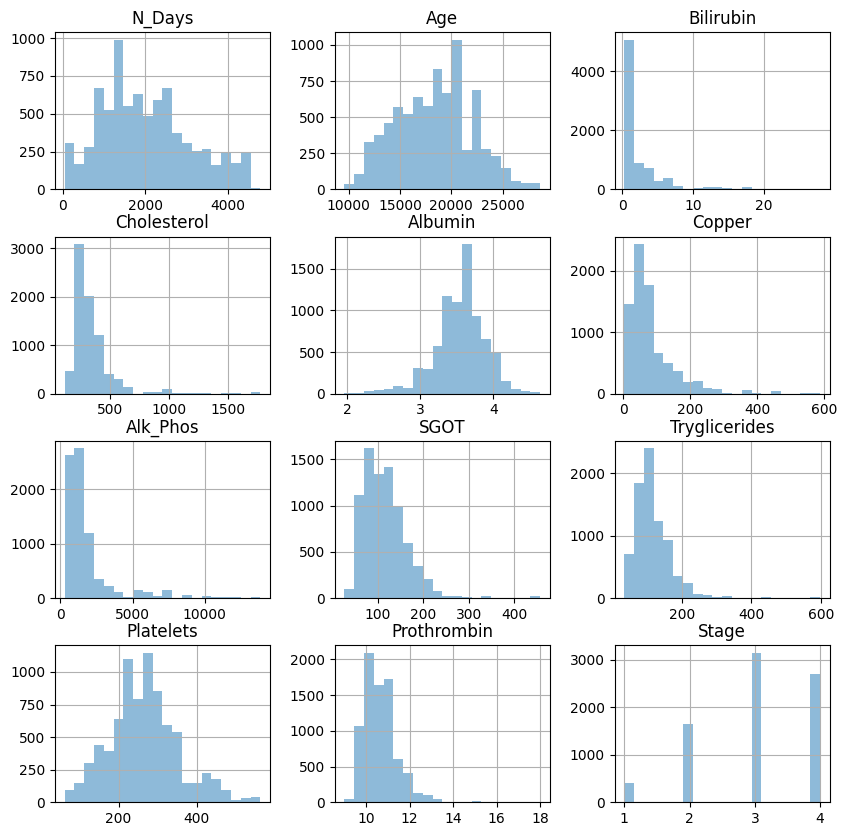

In [15]:
study_columns=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
focused_data = train_data.loc[:, study_columns]
focused_data.hist(figsize=(10, 10), bins=20, alpha=0.5)
plt.show()

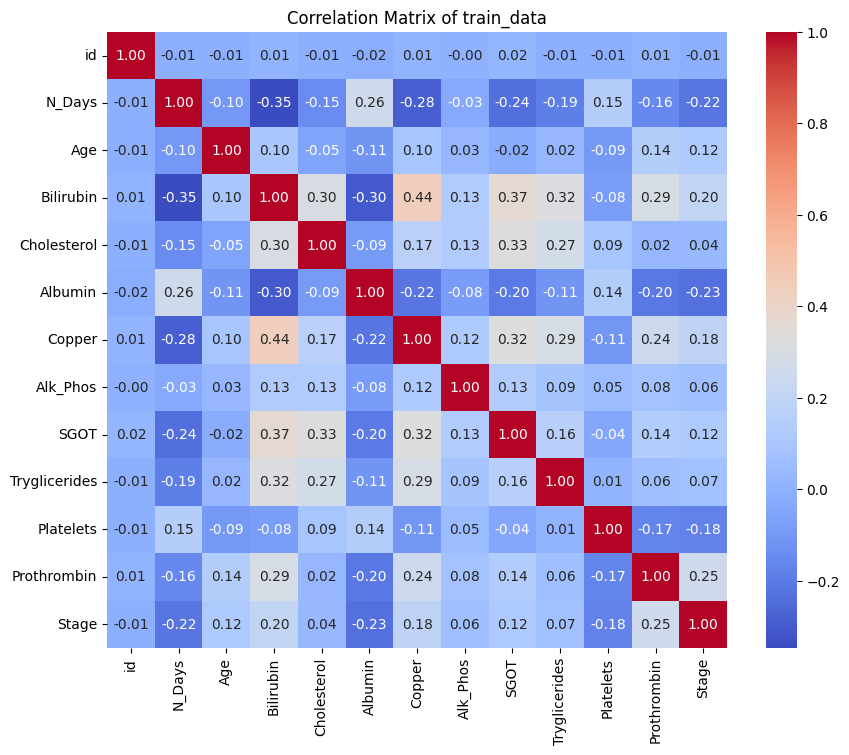

In [16]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of train_data')
plt.show()

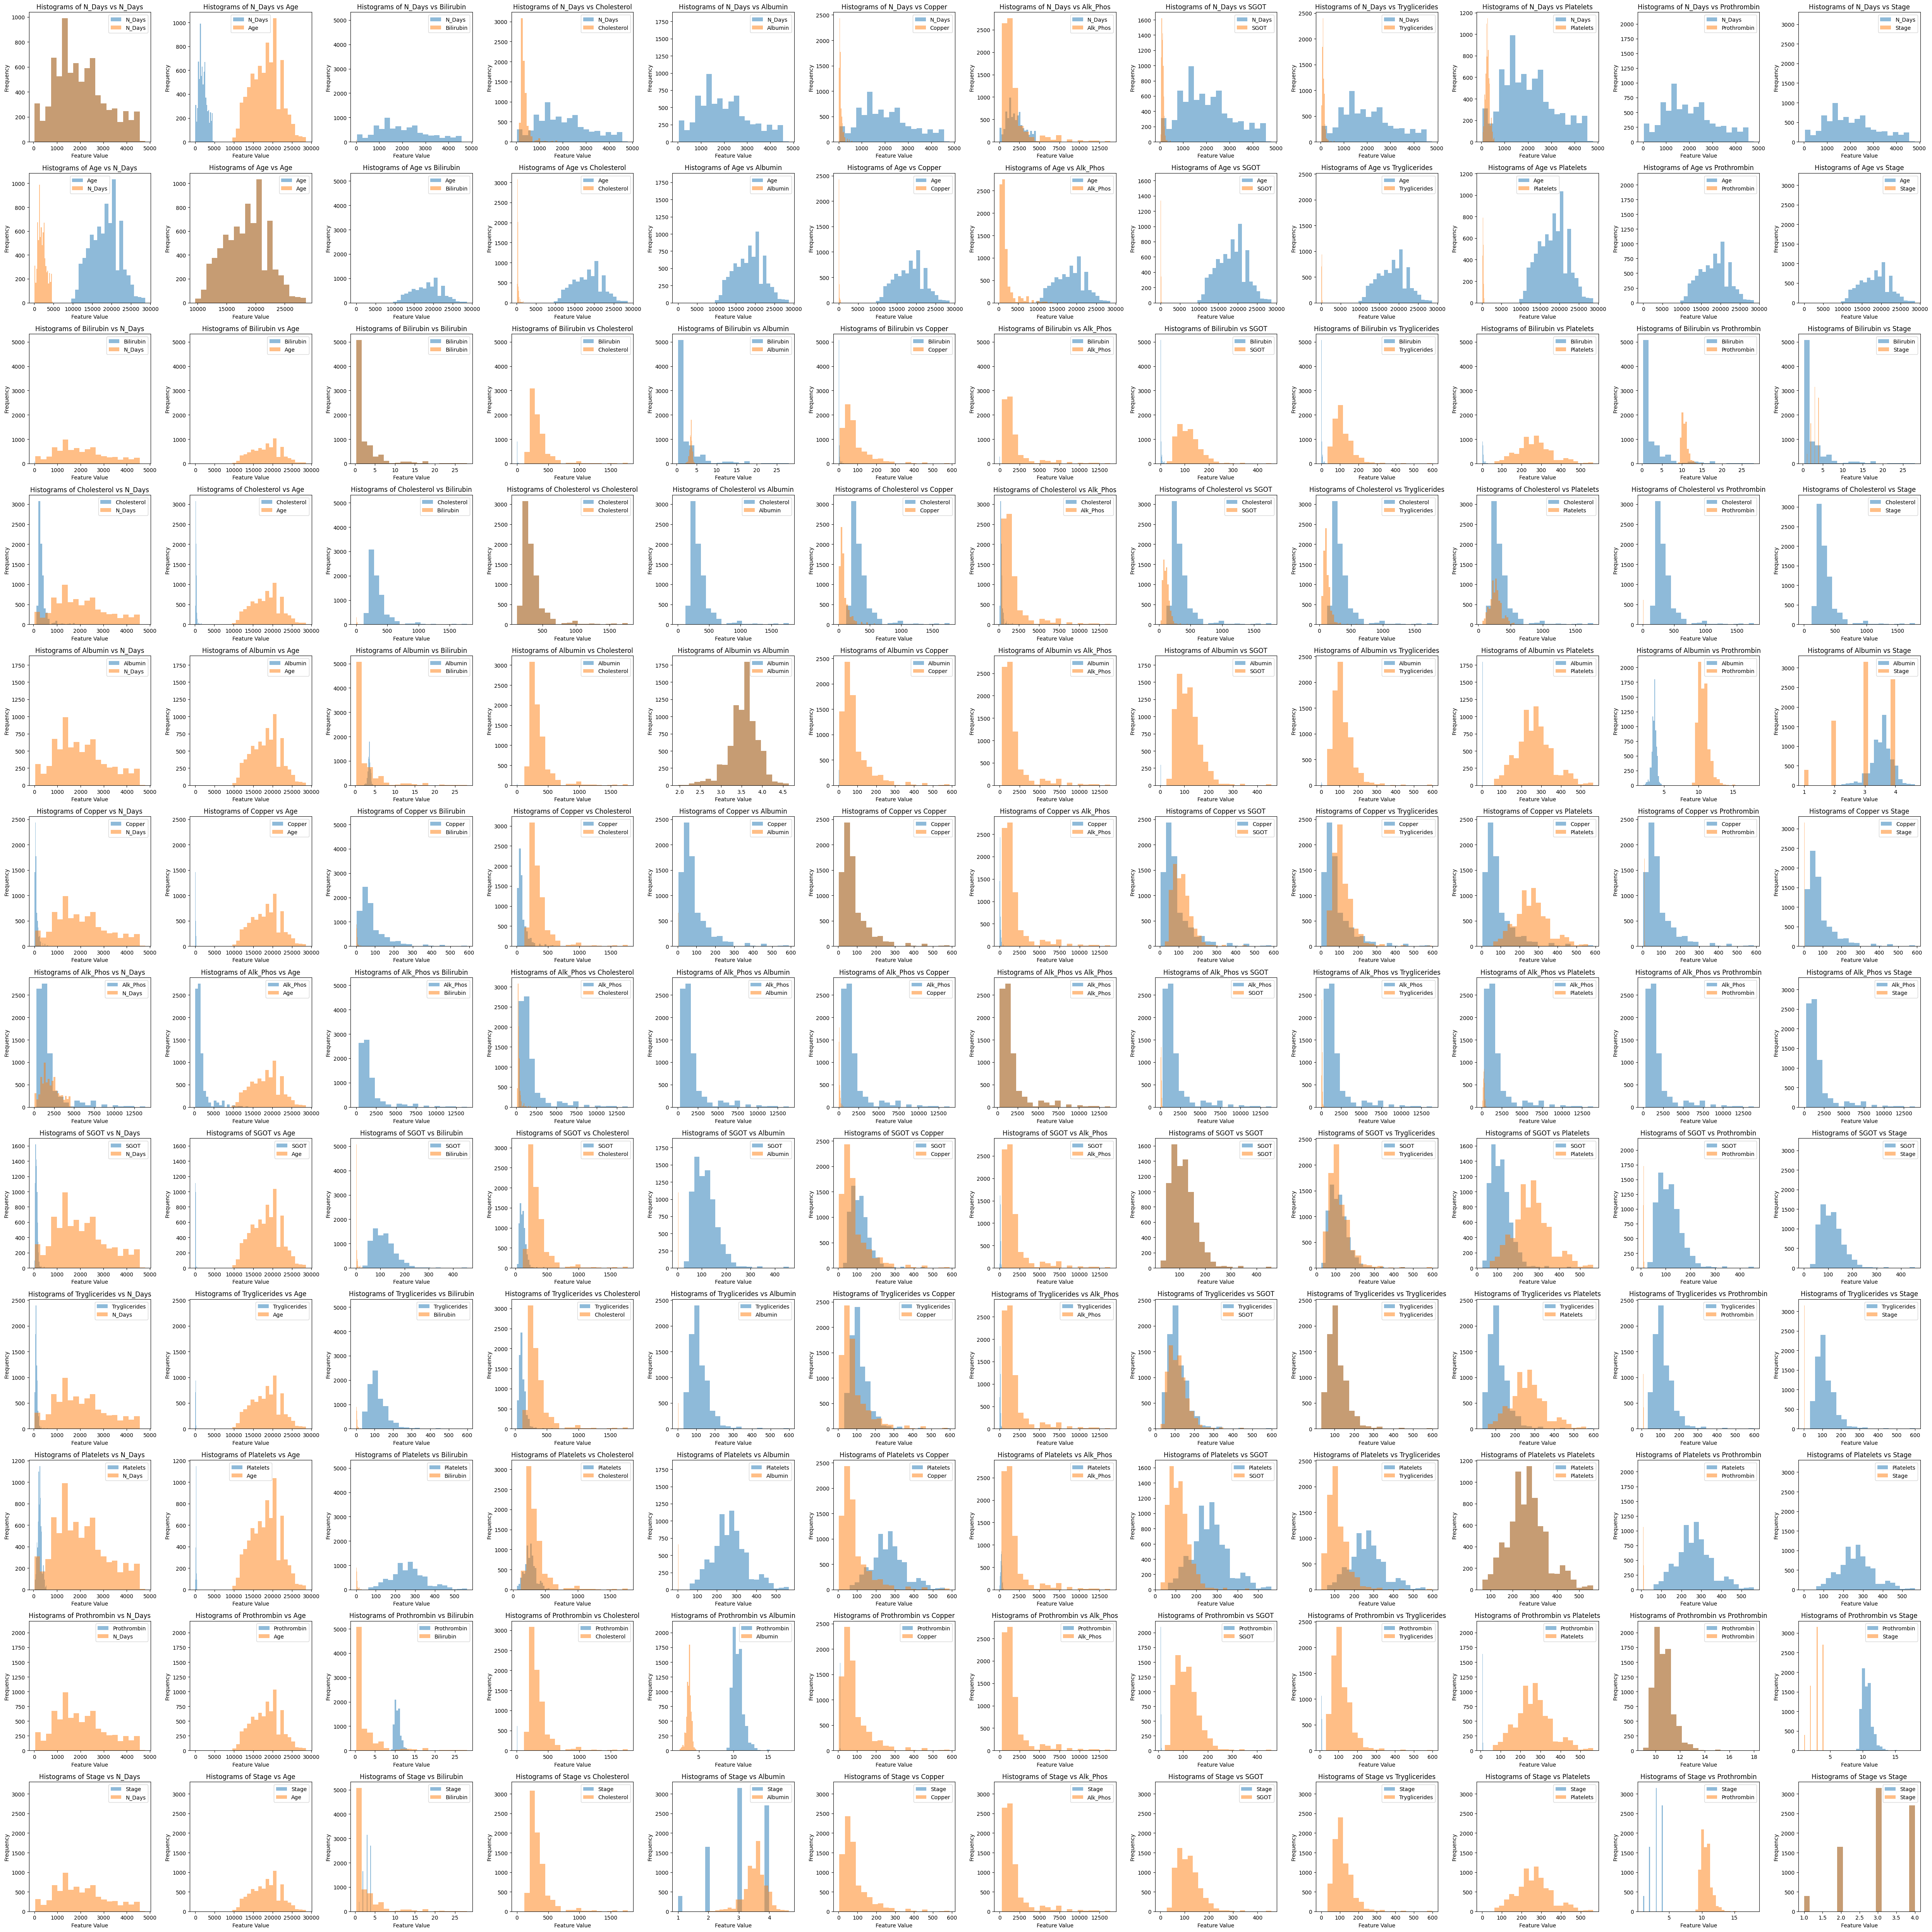

In [17]:
ref_alp_data = train_data.loc[:, study_columns]
num_features = len(ref_alp_data.columns)

fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(50, 50))

for i, feature1 in enumerate(ref_alp_data.columns):
    for j, feature2 in enumerate(ref_alp_data.columns):
        ax = axes[i, j]
        ax.hist(ref_alp_data[feature1], bins=20, alpha=0.5, label=feature1)
        ax.hist(ref_alp_data[feature2], bins=20, alpha=0.5, label=feature2)
        ax.set_title(f'Histograms of {feature1} vs {feature2}')
        ax.set_xlabel('Feature Value')
        ax.set_ylabel('Frequency')
        ax.legend()

#layout
plt.tight_layout()
plt.show()

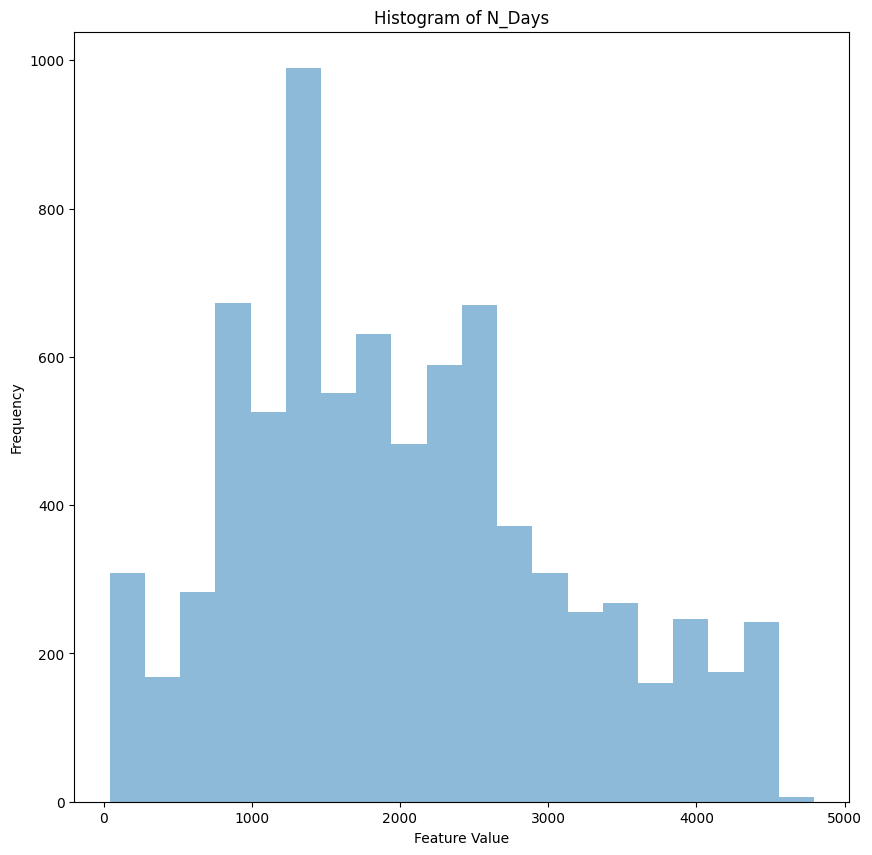

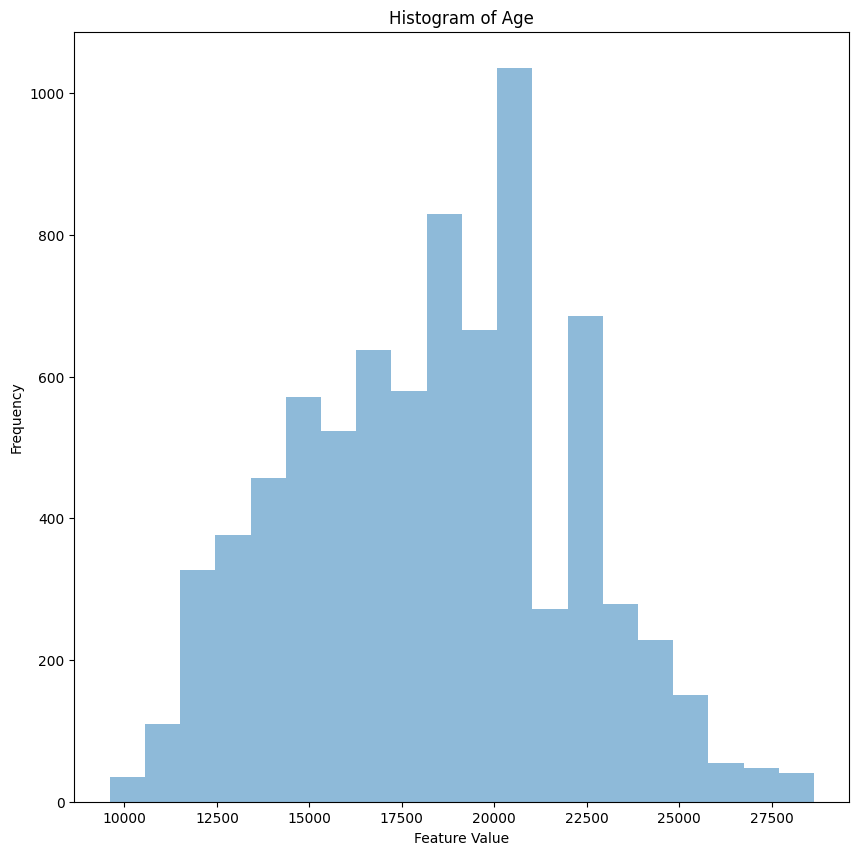

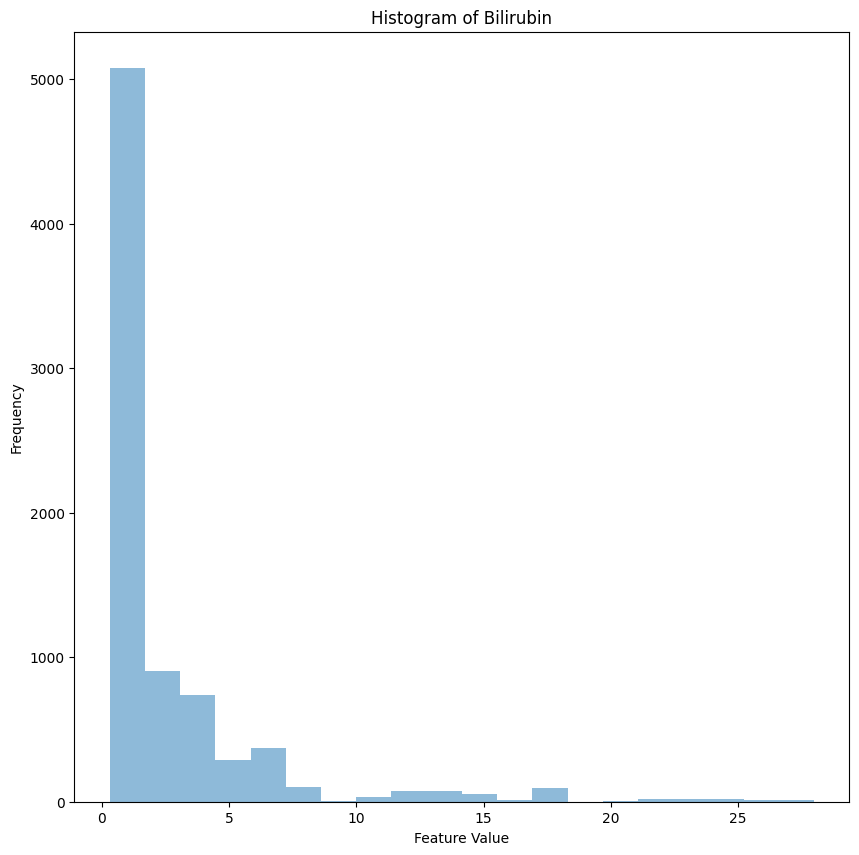

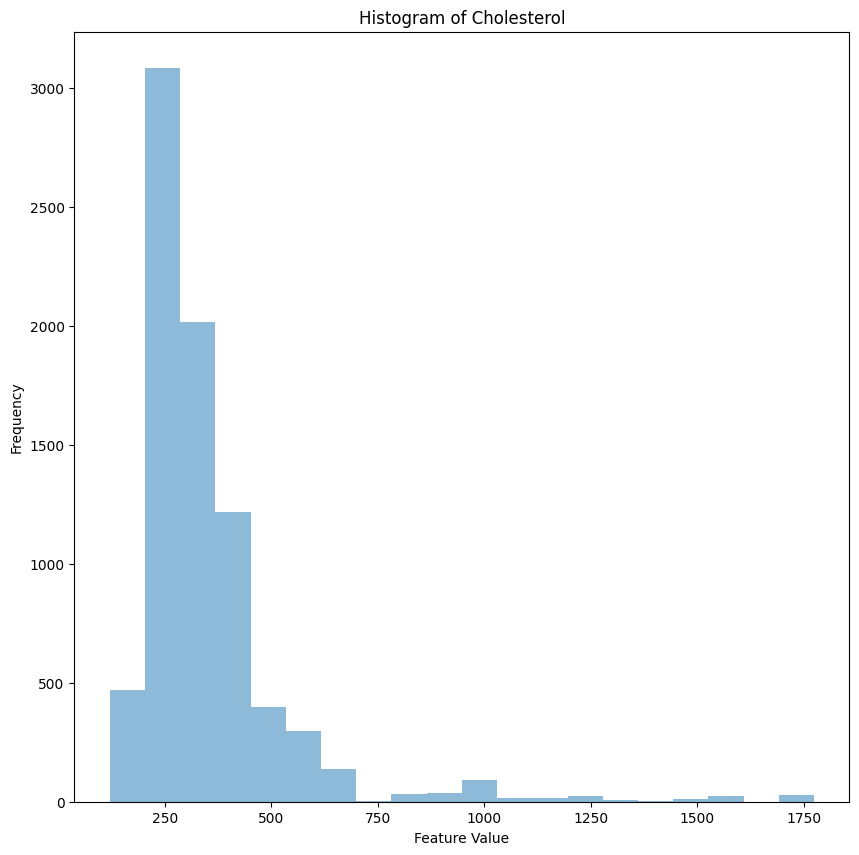

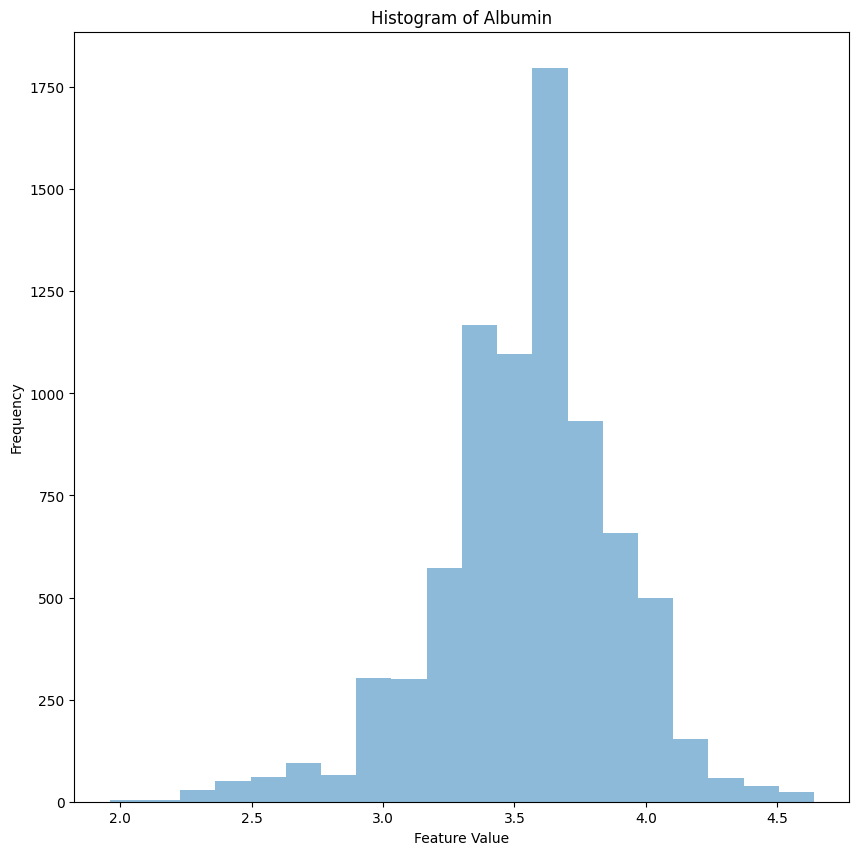

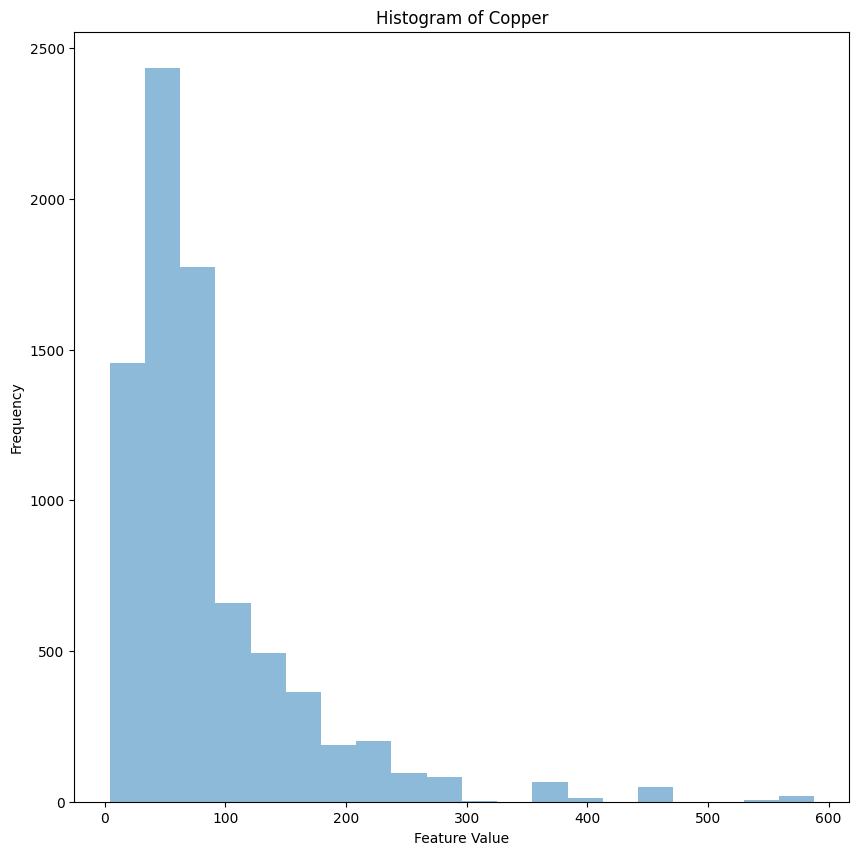

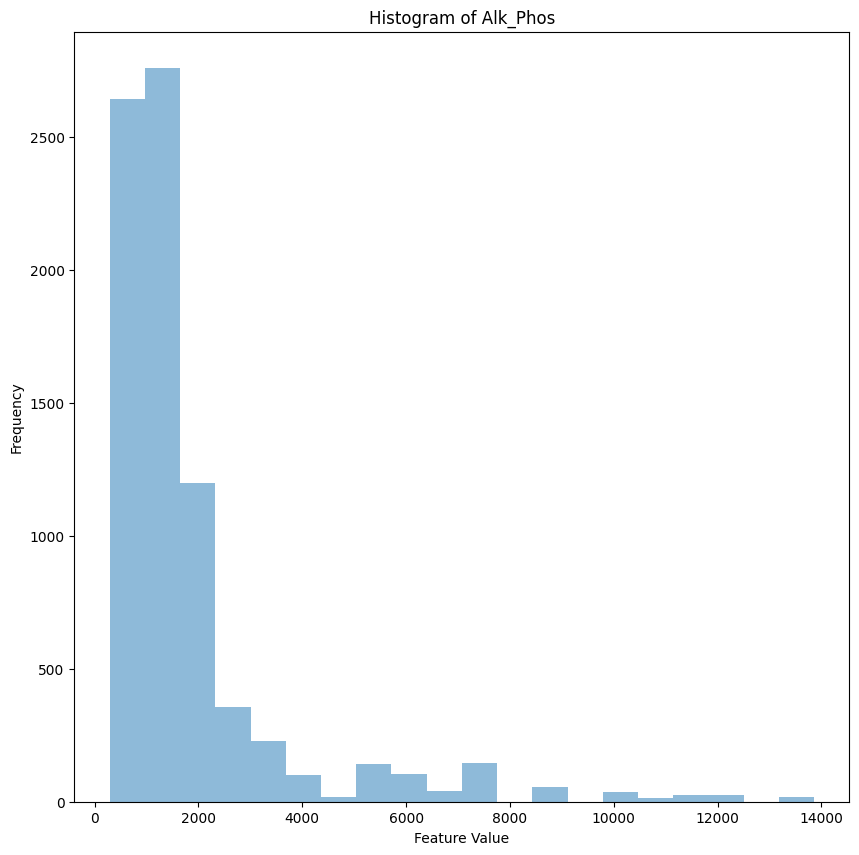

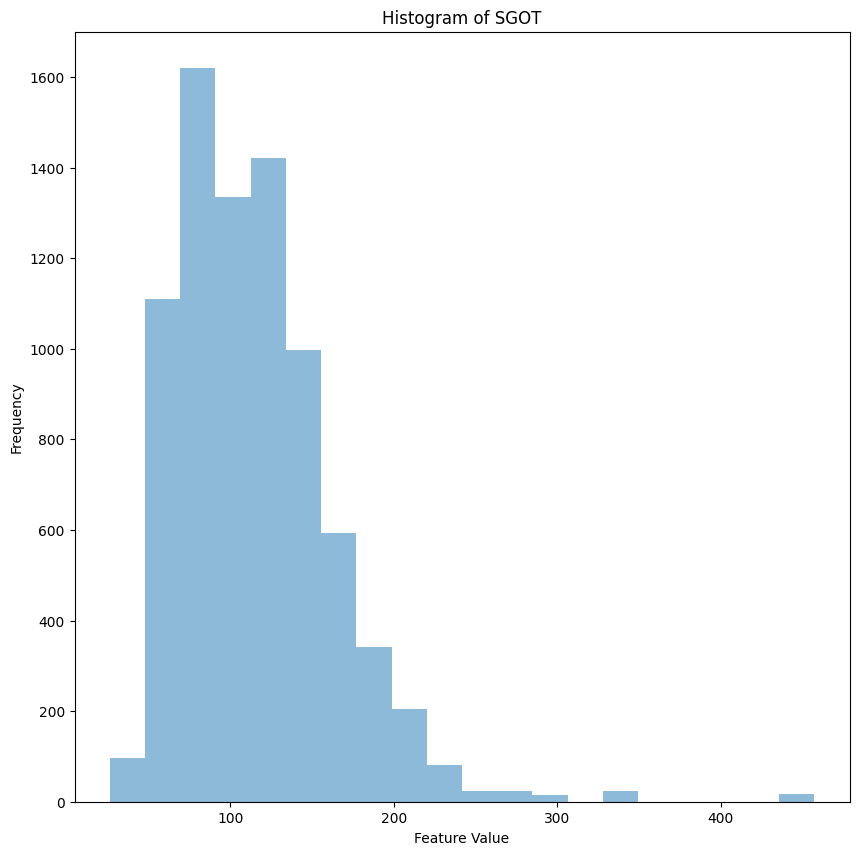

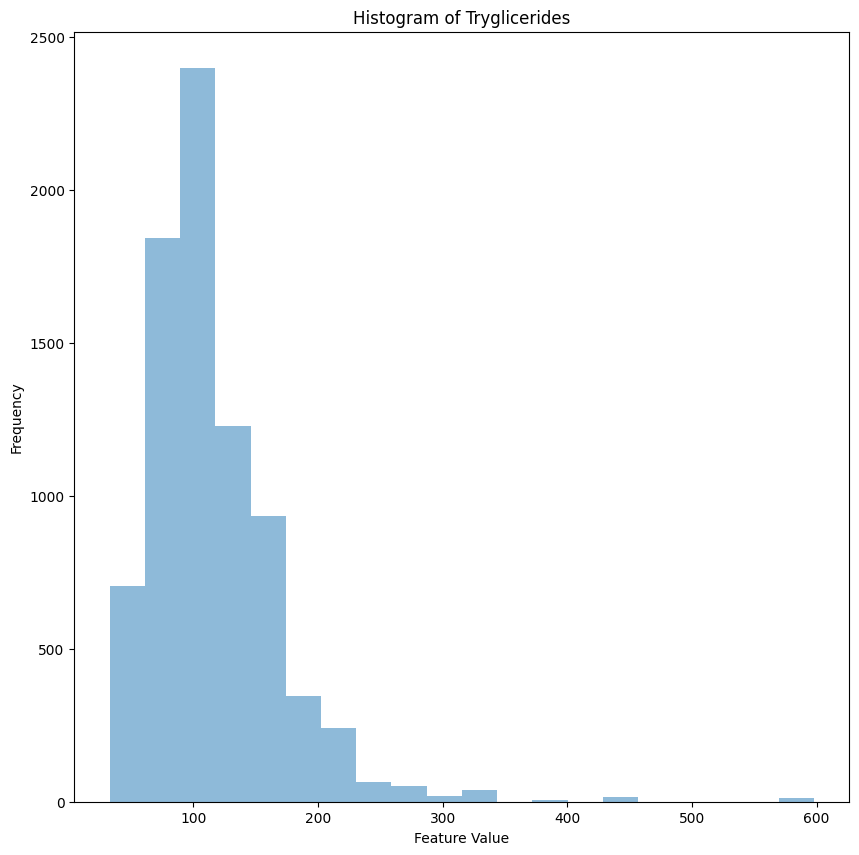

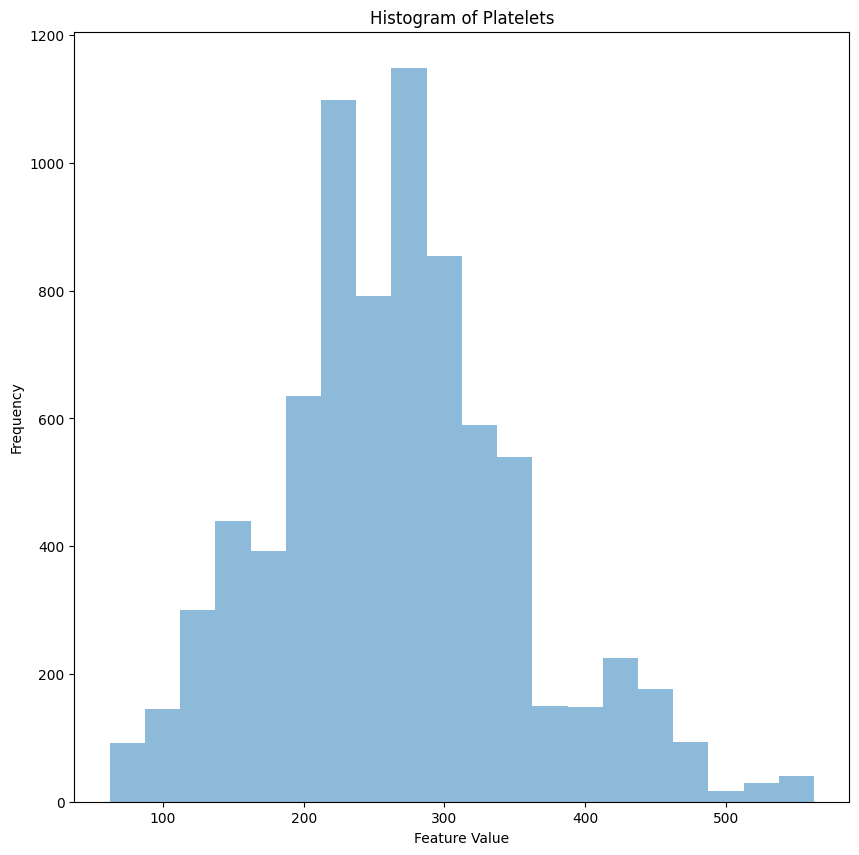

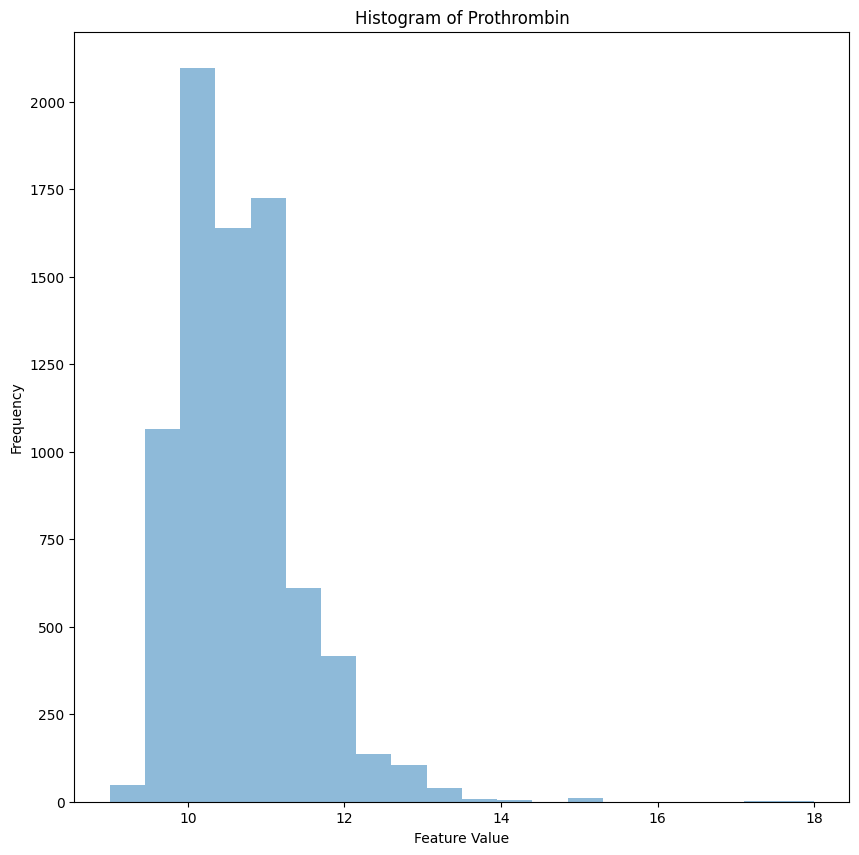

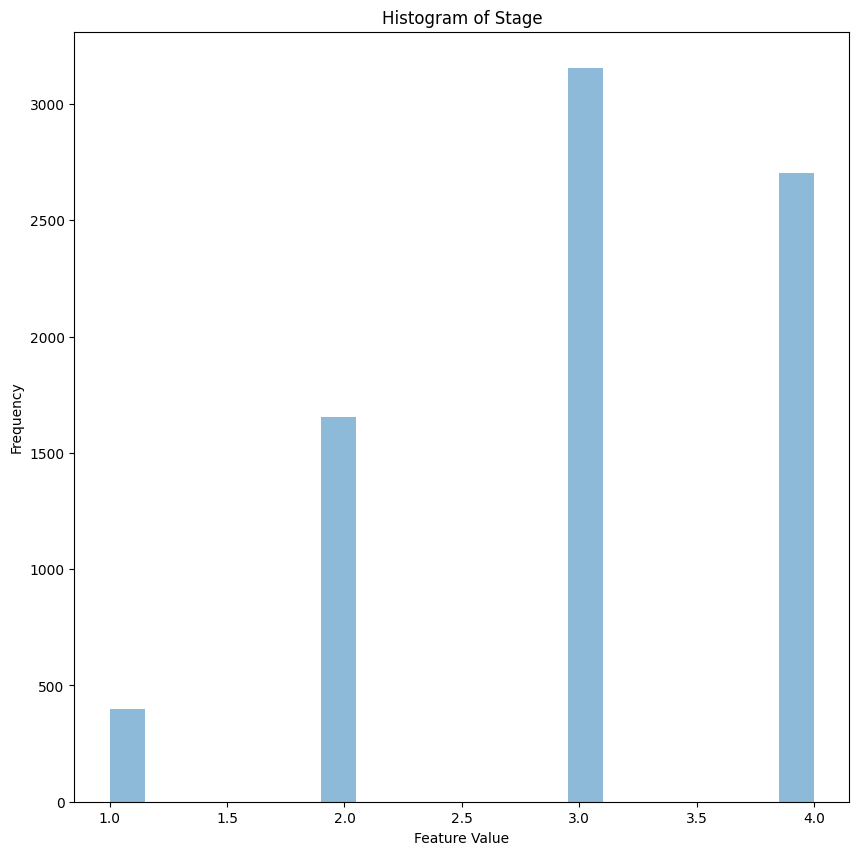

In [18]:
subplot_size = 10  # Adjust this value as needed

# Loop through each feature and plot its histogram
for feature in ref_alp_data.columns:
    plt.figure(figsize=(subplot_size, subplot_size))
    plt.hist(ref_alp_data[feature], bins=20, alpha=0.5)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

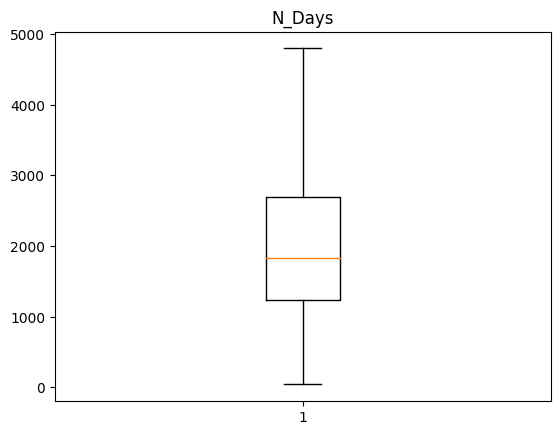

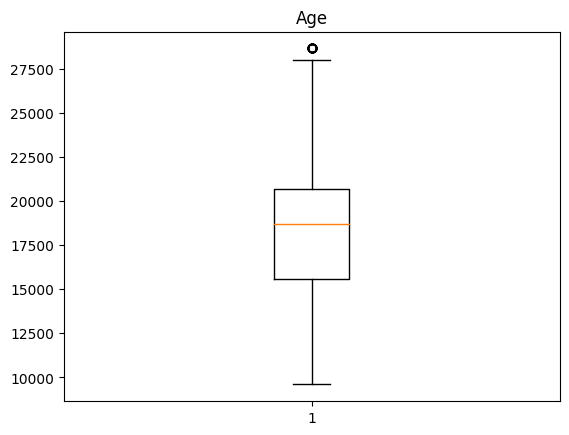

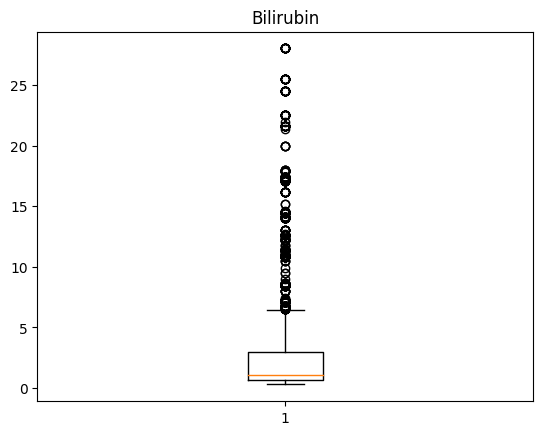

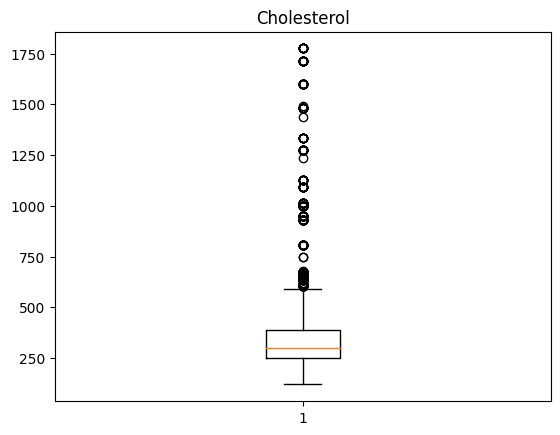

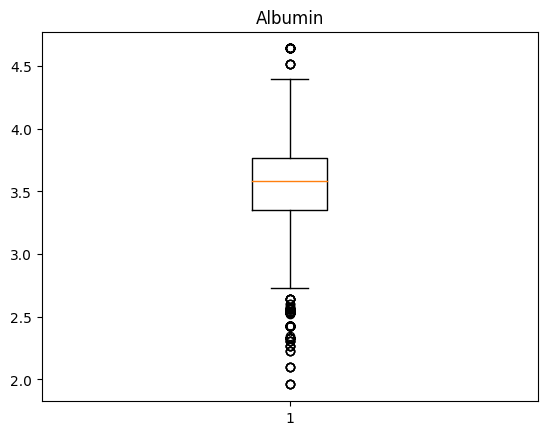

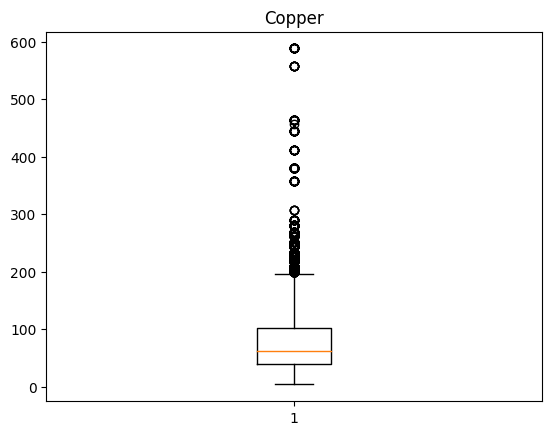

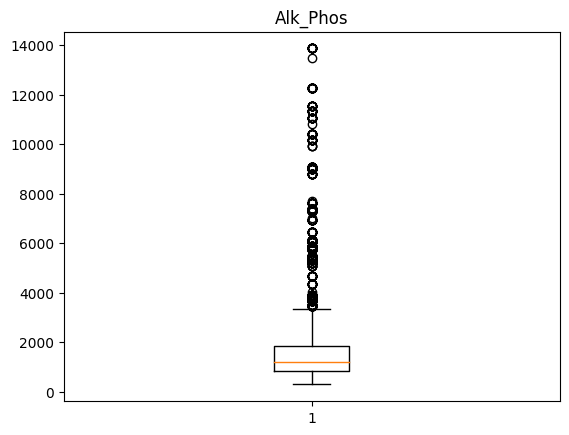

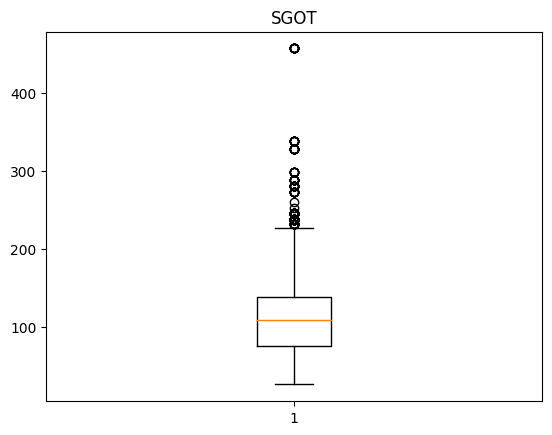

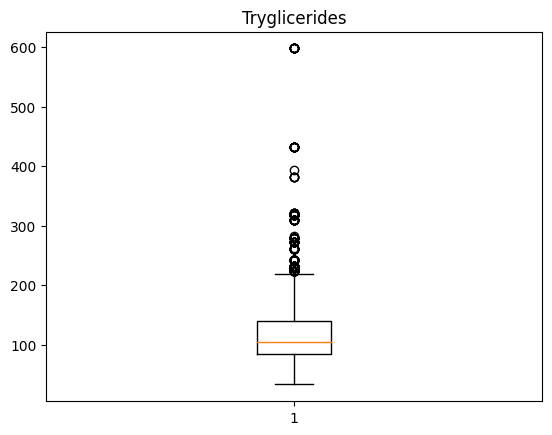

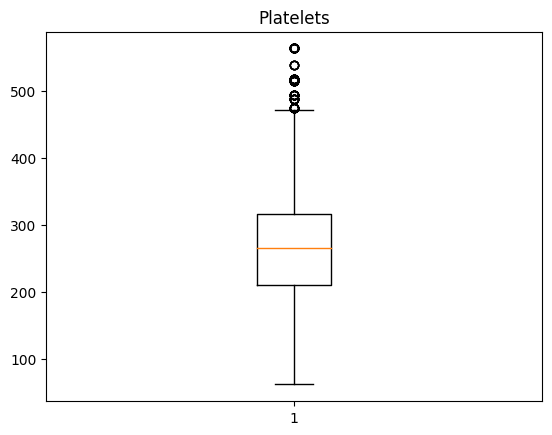

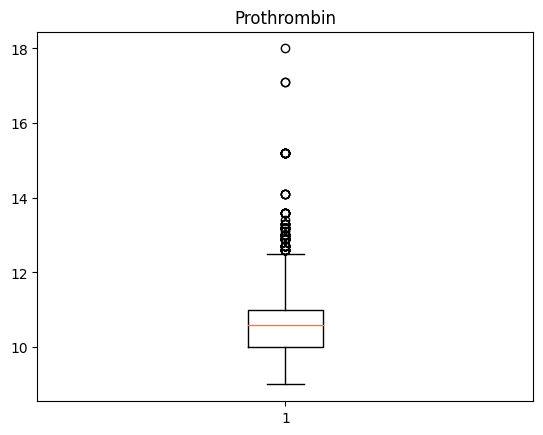

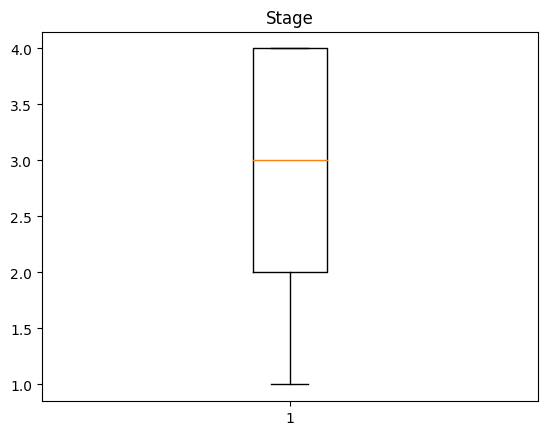

In [19]:
for feature in focused_data.columns:
    if train_data[feature].dtype in ['int64', 'float64']:
        plt.boxplot(train_data[feature])
        plt.title(f'{feature}')
        plt.show()

In [20]:
train_objects = train_data.select_dtypes('object')
train_objects

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,D-penicillamine,M,N,N,N,N,D
1,Placebo,F,N,N,N,N,C
2,Placebo,F,N,Y,Y,Y,D
3,Placebo,F,N,N,N,N,C
4,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...
7900,D-penicillamine,F,N,N,N,N,C
7901,Placebo,F,N,Y,N,N,C
7902,D-penicillamine,F,N,N,Y,S,D
7903,D-penicillamine,M,N,Y,N,N,D


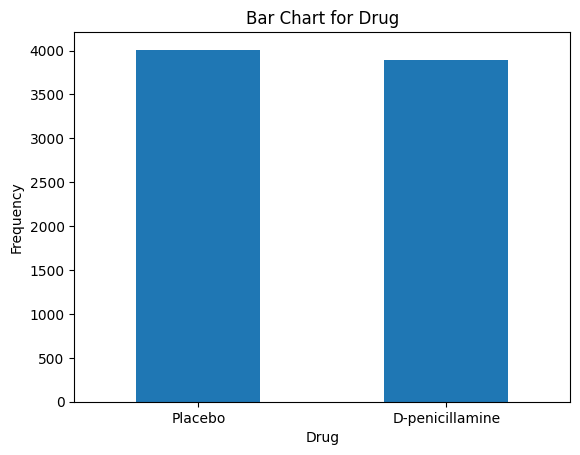

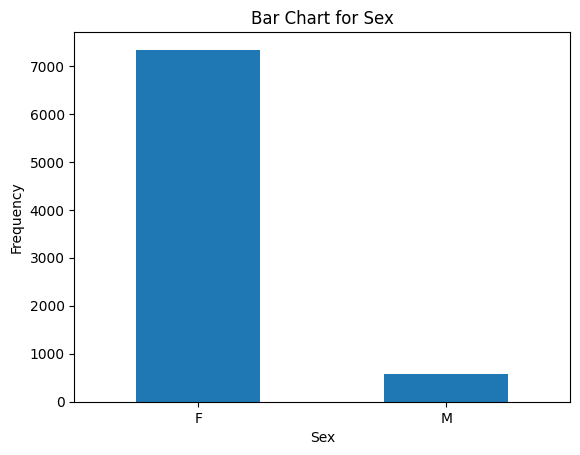

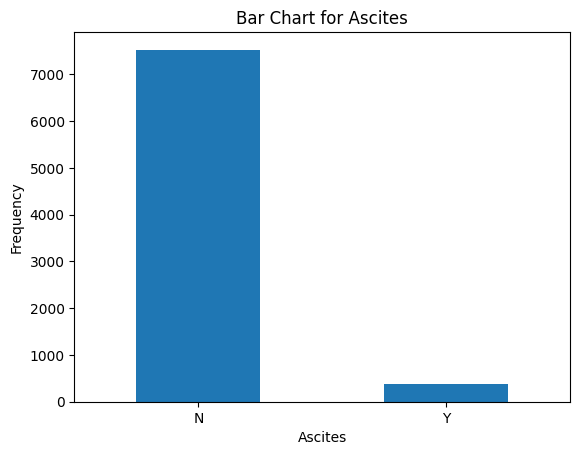

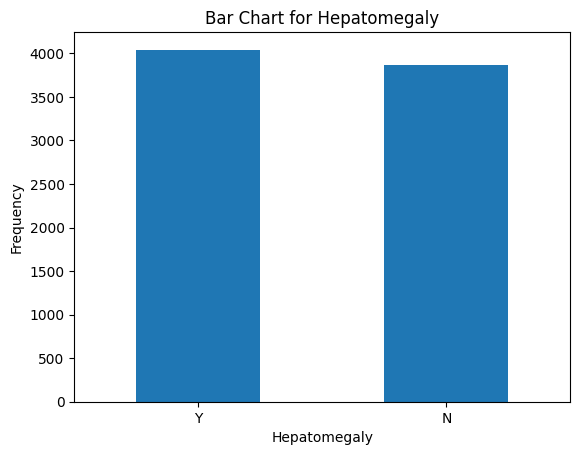

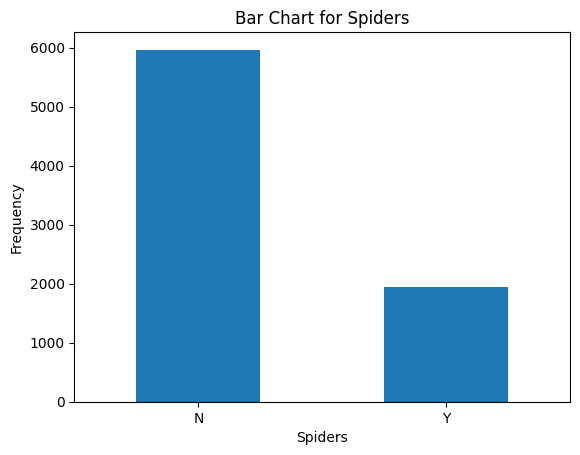

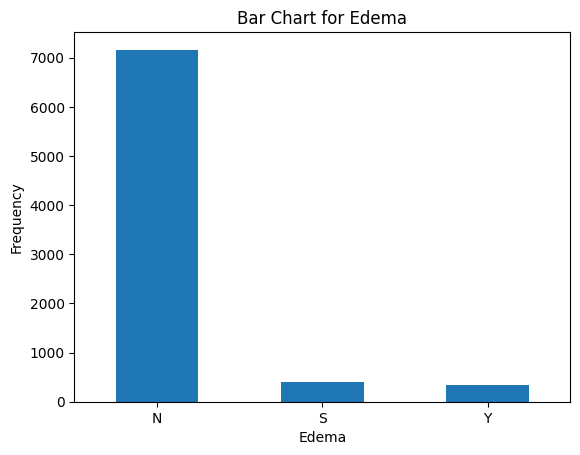

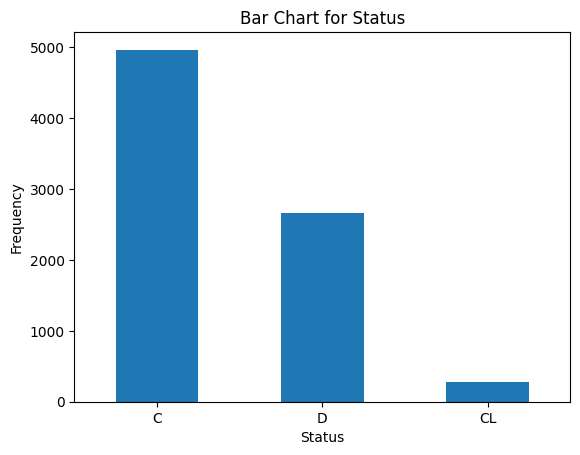

In [21]:
#Visualizing the Categorical Values - frequency isolation per unique entries:
categorical_focus=['Drug', 'Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']
object_focused=train_data.loc[:, categorical_focus]

for col in object_focused.columns:
    object_focused[col].value_counts().plot(kind='bar', rot=0)
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [22]:
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [23]:
#refined copy of data:
train_beta=train_data.copy()

In [24]:
#Take care of outliers next:
columns_to_transform = ['Bilirubin', 'Cholesterol', 'Albumin', 
                        'Copper', 'Alk_Phos', 
                        'SGOT', 'Tryglicerides','Platelets','Prothrombin']

for column in columns_to_transform:
    train_beta[f'{column}_log'] = np.log1p(train_beta[column])
    train_beta.drop(column, axis=1, inplace=True)

In [25]:
#Remove Age outliers:
train_beta

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status,Bilirubin_log,Cholesterol_log,Albumin_log,Copper_log,Alk_Phos_log,SGOT_log,Tryglicerides_log,Platelets_log,Prothrombin_log
0,0,999,D-penicillamine,21532,M,N,N,N,N,3.0,D,1.193922,5.758902,1.470176,5.153292,7.379008,5.197391,4.158883,5.978886,2.370244
1,1,2574,Placebo,19237,F,N,N,N,N,3.0,C,0.641854,5.899897,1.512927,4.158883,7.273093,4.911551,4.488636,5.891644,2.484907
2,2,3428,Placebo,13727,F,N,Y,Y,Y,4.0,D,1.458615,5.703782,1.515127,4.882802,6.937314,4.790404,3.931826,5.298317,2.541602
3,3,2576,Placebo,18460,F,N,N,N,N,3.0,C,0.470004,5.549076,1.504077,4.077537,7.410952,4.280824,4.574711,5.598422,2.459589
4,4,788,Placebo,16658,F,N,Y,N,N,4.0,C,0.741937,5.849325,1.536867,4.158883,7.074963,4.840637,4.574711,5.700444,2.451005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,2.0,C,0.587787,5.736572,1.517323,3.663562,7.396335,4.382651,5.416100,5.843544,2.388763
7901,7901,1492,Placebo,17031,F,N,Y,N,N,4.0,C,0.641854,5.564520,1.488400,4.143135,7.273093,4.962845,4.369448,5.627621,2.397895
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,D,1.098612,5.420535,1.432701,3.951244,6.839476,4.259153,4.143135,5.303305,2.617396
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,4.0,D,0.530628,5.517453,1.321756,3.496508,6.911747,4.066459,4.779123,5.402677,2.451005


In [26]:
from scipy.stats import boxcox

columns_to_transform = ['Bilirubin_log', 'Cholesterol_log', 'Albumin_log', 
                        'Copper_log', 'Alk_Phos_log', 
                        'SGOT_log', 'Tryglicerides_log', 'Platelets_log', 'Prothrombin_log']

for column in columns_to_transform:
    # Check for negative or zero values
    if (train_beta[column] <= 0).any():
        # Shift the values to make them strictly positive
        train_beta[column] += abs(train_beta[column].min()) + 1
    
    # Apply Box-Cox transformation
    transformed_values, lambda_param = boxcox(train_beta[column])
    
    # Replace the original column with the transformed values
    train_beta[f'{column}_boxcox'] = transformed_values

    # Optionally, you can store lambda parameters if you need to inverse transform later
    train_beta[f'{column}_lambda'] = lambda_param

    # Drop the original column
    train_beta.drop(column, axis=1, inplace=True)

In [27]:
#deletion of remaining outliers 
columns_to_check = ['Age', 'Cholesterol_log_boxcox', 'Albumin_log_boxcox', 
                    'Copper_log_boxcox', 'Alk_Phos_log_boxcox', 
                    'SGOT_log_boxcox', 'Tryglicerides_log_boxcox', 
                    'Platelets_log_boxcox', 'Prothrombin_log_boxcox']

outliers_indices = {}
for column in columns_to_check:
    outliers_indices[column] = detect_outliers(train_beta, column)

# Flatten the list of indices
all_outliers = [index for indices in outliers_indices.values() for index in indices]

# Drop rows containing outliers
train_beta = train_beta.drop(all_outliers)

In [28]:
# I got really frustrated here and hard coded this garbage 

rem_list=[7500, 1307, 1455, 1793, 2572, 2757, 2924, 3013, 3649, 3937, 4867, 5335, 5430, 5470, 5718, 5847, 6486, 7092, 7146, 7500, 39, 347, 532, 983, 1244, 1880, 1895, 2974, 3289, 3558, 3643, 3717, 3952, 4019, 4128, 4492, 4992, 5053, 5391, 5464, 5488, 5496, 5715, 5733, 5790, 5810, 5875, 5998, 6011, 6392, 6610, 6621, 6628, 6935, 7150, 7153, 7220, 7331, 7437,1004, 1036, 1257, 1862, 2124, 2772, 2952, 2987, 3361, 3816, 3903, 5167, 5243, 6538, 7077, 7251, 7482,506, 656, 1458, 1950, 2304, 2845, 2895, 3134, 3363, 3566, 3954, 4201, 4242, 4691, 4926, 5064, 5322, 5441, 5502, 5557, 6107, 6257, 6349, 6546, 6609, 6875,120, 216, 395, 429, 450, 511, 516, 528, 604, 647, 799, 989, 1055, 1114, 1153, 1403, 1657, 1798, 1850, 1872, 2377, 2393, 2417, 2448, 2750, 2857, 2931, 3113, 3133, 3182, 3216, 3295, 3505, 3515, 3568, 3569, 3780, 4100, 4153, 4309, 4351, 4382, 4479, 4483, 4556, 4846, 5029, 5091, 5136, 5352, 5381, 5445, 5503, 5665, 5728, 5804, 5923, 6166, 6211, 6314, 6368, 6417, 6530, 6636, 6712, 6786, 6868, 6882, 7376, 7516, 7523, 7531, 7544, 7742, 7837,341, 418, 458, 589, 705, 710, 774, 877, 1064, 1078, 1101, 1146, 1202, 1611, 1659, 1736, 1943, 1949, 2100, 2277, 2372, 2546, 2577, 2614, 2637, 2692, 2914, 3186, 3210, 3213, 3229, 3325, 3332, 3349, 3617, 3683, 3736, 3762, 3899, 4060, 4324, 4467, 4469, 4695, 4724, 4758, 4763, 4906, 4933, 5101, 5253, 5265, 5267, 5276, 5289, 5316, 5602, 5663, 5730, 5778, 5781, 5925, 6138, 6141, 6279, 6289, 6483, 6518, 6668, 6879, 7080, 7247, 7352, 7380, 7423, 7583, 7695, 7726, 7763, 7800,97, 1012, 1217, 1248, 1273, 1284, 1328, 1346, 1518, 1520, 1574, 1580, 1693, 2046, 2081, 2114, 2155, 2368, 2436, 2706, 2730, 2915, 2932, 2992, 3716, 3805, 4181, 4206, 4640, 4700, 4757, 4782, 5012, 5069, 5334, 5541, 5620, 6003, 6114, 6146, 6227, 6294, 6343, 6704, 6860, 7338, 7380, 7532, 7549,235, 432, 800, 938, 1035, 1488, 2150, 2281, 2531, 3271, 3826, 3879, 5300, 5558, 6205, 7199, 7389, 7772]
rem_list = list(set(rem_list))

train_beta = train_beta.drop(rem_list)


In [29]:
#Outlier detection - values:
for column in train_beta.select_dtypes(include=np.number).columns:
    q1=train_beta[column].quantile(0.25)
    q3=train_beta[column].quantile(0.75)
    IQR=q3-q1
    outliers = train_beta[column][((train_beta[column]<(q1-1.5*IQR)) | (train_beta[column]>(q3+1.5*IQR)))]
    
    if len(outliers)>0:
        print(f"Column: {column}")
        print(f"Number of outliers: {len(outliers)}")
        outlier_indices = outliers.index.tolist()
        outlier_values = [train_beta[column][index] for index in outlier_indices]
        #print(f"Values of outliers: {outlier_values}")
        print(outlier_indices)
        print()

In [30]:
#Encoding (apparently one-hot. Ew.):
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
one_hot_encoded = pd.get_dummies(train_beta[categorical_columns])

train_beta = pd.concat([train_beta, one_hot_encoded], axis=1)
train_beta.drop(categorical_columns, axis=1, inplace=True)


In [31]:
train_beta

,id,N_Days,Age,Stage,Bilirubin_log_boxcox,Bilirubin_log_lambda,Cholesterol_log_boxcox,Cholesterol_log_lambda,Albumin_log_boxcox,Albumin_log_lambda,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,0,999,21532,3.0,0.170360,-0.449971,0.269172,-3.709476,1.245610,5.23588,...,1,0,1,0,1,0,0,0,0,1
1,1,2574,19237,3.0,-0.490721,-0.449971,0.269207,-3.709476,1.478238,5.23588,...,1,0,1,0,1,0,0,1,0,0
2,2,3428,13727,4.0,0.347168,-0.449971,0.269157,-3.709476,1.490988,5.23588,...,0,1,0,1,0,0,1,0,0,1
3,3,2576,18460,3.0,-0.899114,-0.449971,0.269112,-3.709476,1.427745,5.23588,...,1,0,1,0,1,0,0,1,0,0
4,4,788,16658,4.0,-0.319464,-0.449971,0.269195,-3.709476,1.621251,5.23588,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,16839,2.0,-0.600303,-0.449971,0.269166,-3.709476,1.503787,5.23588,...,1,0,1,0,1,0,0,1,0,0
7901,7901,1492,17031,4.0,-0.490721,-0.449971,0.269117,-3.709476,1.341329,5.23588,...,0,1,1,0,1,0,0,1,0,0
7902,7902,1576,25873,2.0,0.092086,-0.449971,0.269070,-3.709476,1.063946,5.23588,...,1,0,0,1,0,1,0,0,0,1
7903,7903,3584,22960,4.0,-0.733277,-0.449971,0.269102,-3.709476,0.631904,5.23588,...,0,1,1,0,1,0,0,0,0,1


In [32]:
numerical_vars = train_beta.select_dtypes(include=['number']).columns
categorical_vars = train_beta.select_dtypes(include=['object', 'category']).columns

print("Number of numerical variables:", len(numerical_vars))
print("Number of categorical variables:", len(categorical_vars))

Number of numerical variables: 38
Number of categorical variables: 0


In [33]:
train_alpha=train_beta.copy()

In [34]:
#Rescale (if needed):
#needs normaliztion:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale (excluding ID column)
columns_to_scale = train_alpha.columns.difference(['ID'])

# Apply Min-Max scaling to the selected columns
train_alpha_scaled = train_alpha.copy()
train_alpha_scaled[columns_to_scale] = scaler.fit_transform(train_alpha[columns_to_scale])

# Display the scaled DataFrame
print(train_alpha_scaled.head())

         id    N_Days       Age     Stage  Bilirubin_log_boxcox  \
0  0.000000  0.201515  0.647883  0.666667              0.723887   
1  0.000127  0.532814  0.523290  0.666667              0.485305   
2  0.000253  0.712453  0.224159  1.000000              0.787696   
3  0.000380  0.533235  0.481107  0.666667              0.337918   
4  0.000506  0.157131  0.383279  1.000000              0.547111   

   Bilirubin_log_lambda  Cholesterol_log_boxcox  Cholesterol_log_lambda  \
0                   0.0                0.519767                     0.0   
1                   0.0                0.603019                     0.0   
2                   0.0                0.484534                     0.0   
3                   0.0                0.376573                     0.0   
4                   0.0                0.574242                     0.0   

   Albumin_log_boxcox  Albumin_log_lambda  ...  Hepatomegaly_N  \
0            0.378277                 0.0  ...             1.0   
1            0

In [35]:
#final prep for Ml:
train_sigma=train_alpha_scaled.copy()
train_sigma = train_sigma.drop('id', axis=1)

In [36]:
train_sigma.head()

,N_Days,Age,Stage,Bilirubin_log_boxcox,Bilirubin_log_lambda,Cholesterol_log_boxcox,Cholesterol_log_lambda,Albumin_log_boxcox,Albumin_log_lambda,Copper_log_boxcox,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,0.201515,0.647883,0.666667,0.723887,0.0,0.519767,0.0,0.378277,0.0,0.839512,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.532814,0.523290,0.666667,0.485305,0.0,0.603019,0.0,0.491477,0.0,0.530188,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.712453,0.224159,1.000000,0.787696,0.0,0.484534,0.0,0.497681,0.0,0.755707,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.533235,0.481107,0.666667,0.337918,0.0,0.376573,0.0,0.466906,0.0,0.504725,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.157131,0.383279,1.000000,0.547111,0.0,0.574242,0.0,0.561069,0.0,0.530188,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
print(train_sigma.columns)

Index(['N_Days', 'Age', 'Stage', 'Bilirubin_log_boxcox',
       'Bilirubin_log_lambda', 'Cholesterol_log_boxcox',
       'Cholesterol_log_lambda', 'Albumin_log_boxcox', 'Albumin_log_lambda',
       'Copper_log_boxcox', 'Copper_log_lambda', 'Alk_Phos_log_boxcox',
       'Alk_Phos_log_lambda', 'SGOT_log_boxcox', 'SGOT_log_lambda',
       'Tryglicerides_log_boxcox', 'Tryglicerides_log_lambda',
       'Platelets_log_boxcox', 'Platelets_log_lambda',
       'Prothrombin_log_boxcox', 'Prothrombin_log_lambda',
       'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N',
       'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N',
       'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y', 'Status_C', 'Status_CL',
       'Status_D'],
      dtype='object')


## Machine Learning


### Problem Formulation
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [38]:
# Calculate class distribution
class_distribution = train_sigma[['Status_C', 'Status_CL', 'Status_D']].sum() / len(train_sigma)
print(class_distribution)


Status_C     0.647274
Status_CL    0.035317
Status_D     0.317409
dtype: float64


In [39]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class_C = train_sigma[train_sigma['Status_C'] == 1]
minority_class_CL = train_sigma[train_sigma['Status_CL'] == 1]
minority_class_D = train_sigma[train_sigma['Status_D'] == 1]

# Determine the number of samples in each class
n_samples_CL = len(minority_class_CL)
n_samples_D = len(minority_class_D)
max_minority_samples = max(n_samples_CL, n_samples_D)

# Upsample minority classes (CL and D) to match the number of samples in the majority class (C)
minority_upsampled_CL = resample(minority_class_CL, 
                                 replace=True,     # sample with replacement
                                 n_samples=max_minority_samples,    # to match majority class
                                 random_state=42)  # reproducible results

minority_upsampled_D = resample(minority_class_D, 
                                replace=True,     # sample with replacement
                                n_samples=max_minority_samples,    # to match majority class
                                random_state=42)  # reproducible results

# Combine upsampled minority classes with majority class
balanced_majority_class_C = resample(majority_class_C, 
                                     replace=False,    # sample without replacement
                                     n_samples=max_minority_samples,  # to match minority classes
                                     random_state=42)  # reproducible results

# Combine upsampled minority classes with balanced majority class
resampled_train = pd.concat([balanced_majority_class_C, minority_upsampled_CL, minority_upsampled_D])

# Display class counts
print(resampled_train[['Status_C', 'Status_CL', 'Status_D']].sum())


Status_C     2166.0
Status_CL    2166.0
Status_D     2166.0
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target variable (y)
X = resampled_train.drop(['Status_C', 'Status_CL', 'Status_D'], axis=1)
y = resampled_train[['Status_C', 'Status_CL', 'Status_D']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the best model
print("\nClassification Report with Best Model:\n", classification_report(y_test, y_pred, zero_division=0))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Status_C', 'Status_CL', 'Status_D'], 
            yticklabels=['Status_C', 'Status_CL', 'Status_D'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(y_test.columns)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Application to Test Set:

In [ ]:
testing_set=pd.read_csv('test.csv')
testing_set.head()

In [ ]:
print(testing_set.columns)
print()
print(train_data.columns)
print()
print(train_sigma.columns)

In [ ]:
columns_to_transform = ['Bilirubin', 'Cholesterol', 'Albumin', 
                        'Copper', 'Alk_Phos', 
                        'SGOT', 'Tryglicerides','Platelets','Prothrombin']

for column in columns_to_transform:
    testing_set[f'{column}_log'] = np.log1p(train_beta[column])
    testing_set.drop(column, axis=1, inplace=True)


In [ ]:
print(test_data_encoded.columns)


In [ ]:
# Ensure consistency in feature order
# Assuming 'train_sigma' and 'test_data' have the same feature order

# Separate features (X_test) and target variable (y_test) if applicable
X_test = test_data_encoded.drop(['N_Days'], axis=1)  # Assuming 'N_Days' is not a feature
# There's no target variable in the test data, assuming you're using it for prediction only

# Now you can use your trained Random Forest classifier to make predictions on the test set
y_pred_test = best_rf_classifier.predict(X_test)

# Display the predictions
print(y_pred_test)
